In [ ]:
# !unzip ../data/validation/validation_data.zip

In [1]:
cd ..

/home/jovyan/Robbi/dea-coastlines


In [2]:
pip install -r requirements.in --quiet

You should consider upgrading via the '/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

# Load DEA Coastlines code
import coastlines.validation




In [3]:
!python -m coastlines.validation --help

Usage: python -m coastlines.validation [OPTIONS]

Options:
  --inputs_path TEXT         [required]
  --deacl_path TEXT          [required]
  --prefix TEXT
  --datum TEXT
  --overwrite BOOLEAN
  --layer_name TEXT
  --append_stats BOOLEAN
  --parallelised BOOLEAN
  --markdown_report BOOLEAN
  --help                     Show this message and exit.


In [ ]:
!python -m coastlines.validation --inputs_path data/validation/interim/wrl_narrabeen --deacl_path data/processed/tests/coastlines_tests.gpkg --prefix tests --append_stats True --markdown_report True

In [8]:
!python -m coastlines.validation --inputs_path data/validation/interim/wrl_narrabeen --deacl_path data/releases/coastlines_v0.0.3.gpkg --prefix v0.0.3 --append_stats False --markdown_report False

  0%|                                                     | 0/1 [00:00<?, ?it/s]
/home/jovyan/Robbi/dea-coastlines/coastlines/validation.py:2298: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_vals = val_df.groupby(["year", "id"]).median()
Combining data
/home/jovyan/Robbi/dea-coastlines/coastlines/validation.py:2566: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  stats_df = pd.DataFrame({pd.to_datetime("now"): stats_df}).T.assign(name=prefix)
                                 n   mae  rmse  stdev   corr  bias    name
time                                                                      
2024-02-23 04:36:50.686374  2669.0  4.83  6.14   5.57  0.975 -2.63  v0.0.3


In [21]:
!python -m coastlines.validation --inputs_path data/validation/interim/wrl_narrabeen --deacl_path data/releases/DEACoastlines_v1.1.0.gpkg --layer_name DEACoastlines_annualshorelines_v1.1.0  --prefix v1.1.0 --append_stats False --markdown_report True

  0%|                                                     | 0/1 [00:00<?, ?it/s]
Skipping; file either exists or overwrite set to false
Combining data
                                 n  mae  rmse  stdev   corr  bias    name
time                                                                     
2023-02-08 00:01:06.359381  2669.0  4.8  6.07   5.49  0.976 -2.64  v1.1.0


In [ ]:
# !python -m pytest tests/ -v

In [11]:
# coastlines.validation.validation_cli

<function coastlines.validation.validation_cli(inputs_path, deacl_path, prefix, datum, overwrite, layer_name, append_stats, parallelised, markdown_report)>

In [25]:
outputs_df, stats_df = coastlines.validation.validation_cli(
    inputs_path="data/validation/interim/wrl_narrabeen",
    deacl_path="data/processed/tests/coastlines_tests.gpkg",
    prefix="tests",
    datum="0",
    overwrite=False,
    layer_name='shorelines_annual',
    append_stats=True,
    parallelised=True,
    markdown_report=True)
    

prefix='tests'
deacl_path="data/processed/tests/coastlines_tests.gpkg"

In [26]:
# Test to get all outputs for temporal plotting
outputs_df = coastlines.validation.validation_cli(
    inputs_path="data/validation/interim/",
    deacl_path="data/releases/coastlines_v2.0.0.gpkg",
    prefix="tests",
    datum="0",
    overwrite=False,
    layer_name='shorelines_annual',
    append_stats=True,
    parallelised=True,
    markdown_report=True)
    

# prefix='tests'
# deacl_path="data/processed/tests/coastlines_tests.gpkg"

In [29]:
(outputs_df.error_m ** 2).groupby("year")

0      0.132725
1     18.480537
0      3.479032
1     73.598530
2    306.425871
        ...    
5     73.174714
6     17.937049
7     37.693972
8     68.825562
9     85.182771
Name: error_m, Length: 50010, dtype: float64

In [31]:
outputs_df['error_sq'] = outputs_df.error_m ** 2

<Axes: xlabel='year'>

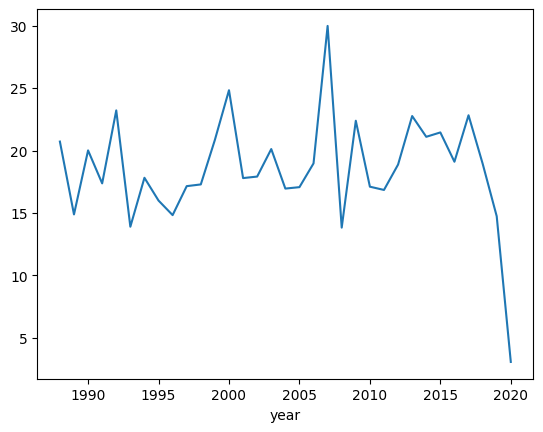

In [37]:
import numpy as np
np.sqrt(outputs_df.groupby("year")['error_sq'].mean()).plot()

In [22]:
outputs_df = pd.read_csv("data/validation/processed/stats_v1.1.0.csv")

In [23]:
outputs_df

,time,n,mae,rmse,stdev,corr,bias,name
0,2023-02-08 00:01:06.359381,2669.0,4.8,6.07,5.49,0.976,-2.64,v1.1.0


In [ ]:
!python -m coastlines.validation --inputs_path data/validation/interim/cgc --deacl_path data/releases/coastlines_v0.0.3.gpkg --prefix v0.0.3 --append_stats False

In [5]:
import glob
prefix='v0.0.3'

print('Combining data')
stats_list = glob.glob(f'data/validation/processed/outputs_{prefix}_*.csv')
stats_df = pd.concat([pd.read_csv(csv) for csv in stats_list])

# # Rename smartline categories to smaller subset
# stats_df['smartline'] = stats_df.smartline.replace(rename_dict)

# # Run stats
# stats_df = coastlines.validation.deacl_val_stats(stats_df.val_dist,
#                 stats_df.deacl_dist,
#                 n=stats_df.n,
#                 remove_bias=False)
# # print(stats_df.T)
# # stats_df.T.to_csv(f'data/validation/processed/stats_{prefix}.csv')

Combining data


ValueError: No objects to concatenate

In [ ]:
# !python -m pytest tests/ -v

In [ ]:
val_df = coastlines.validation.deacl_validation(val_path='data/validation/interim/2020test_narrabeen.csv', deacl_path='data/releases/coastlines_v0.0.3.gpkg', datum=0, prefix='test', overwrite=True, layer_name='shorelines_annual')

In [ ]:
!wget https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/dea_coastlines/v0.0.3/coastlines_v0.0.3.gpkg -P data/releases

In [ ]:
!wget https://data.dea.ga.gov.au/derivative/dea_coastlines/1-1-0/DEACoastlines_gpkg_v1.1.0.zip -P data/releases

In [ ]:
!unzip data/releases/DEACoastlines_gpkg_v1.1.0.zip data/releases

In [ ]:
import glob

val_paths = glob.glob('data/validation/interim/*2020test_narrabeen.csv')

prefix = 'v0.0.3'
deacl_path = 'data/releases/coastlines_v0.0.3.gpkg'
layer_name = 'shorelines_annual'

# prefix = 'v1.1.0'
# deacl_path = 'data/releases/DEACoastlines_v1.1.0.gpkg'
# layer_name = 'DEACoastlines_annualshorelines_v1.1.0'

In [ ]:
  
# Non-parallel (for testing)
for val_path in val_paths:
#     try:
    coastlines.validation.deacl_validation(val_path=val_path, deacl_path=deacl_path, datum=0, prefix=prefix, overwrite=True, layer_name=layer_name)
#     except:
#         print

In [ ]:
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
from itertools import repeat

args = [deacl_path, 0, prefix, True]

with ProcessPoolExecutor() as executor:

    # Apply func in parallel
    groups = val_paths
    to_iterate = (groups, *(repeat(i, len(groups)) for i in args))
    tqdm(executor.map(coastlines.validation.deacl_validation, *to_iterate), total=len(groups))


In [6]:
# Load all results into a single file
print('Combining data')
stats_list = glob.glob(f'data/validation/processed/{prefix}_*.csv')
stats_df = pd.concat([pd.read_csv(csv) for csv in stats_list])

# Rename smartline categories to smaller subset
stats_df['smartline'] = stats_df.smartline.replace(rename_dict)

# Export to file
# stats_df.to_csv('deacl_results.csv', index=False)

# Run stats
coastlines.validation.deacl_val_stats(stats_df.val_dist,
                          stats_df.deacl_dist,
                          n=stats_df.n,
                          remove_bias=True)

Combining data


ValueError: No objects to concatenate

In [ ]:
v111 = stats_df.groupby('year').apply(lambda x: coastlines.validation.deacl_val_stats(x.val_dist,
                          x.deacl_dist,
                          n=x.n,
                          remove_bias=True))

In [ ]:
# Load all results into a single file
print('Combining data')
stats_list = glob.glob(f'data/validation/processed/{prefix}_*.csv')
stats_df = pd.concat([pd.read_csv(csv) for csv in stats_list])

# Rename smartline categories to smaller subset
stats_df['smartline'] = stats_df.smartline.replace(rename_dict)

# Export to file
# stats_df.to_csv('deacl_results.csv', index=False)

# Run stats
coastlines.validation.deacl_val_stats(stats_df.val_dist,
                          stats_df.deacl_dist,
                          n=stats_df.n,
                          remove_bias=True)

In [ ]:
v200 = stats_df.groupby('year').apply(lambda x: coastlines.validation.deacl_val_stats(x.val_dist,
                          x.deacl_dist,
                          n=x.n,
                          remove_bias=True))

In [ ]:
v111.rmse.rename('v1.1.0').plot(legend=True)
v200.rmse.rename('v2.0.0').plot(legend=True)

In [ ]:
# Stats by substrate, no bias correction
by_smartline = stats_df.query("n >= 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_smartline_nobias = stats_df.query("n >= 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

out = coastlines.validation.rse_tableformat(by_smartline, by_smartline_nobias, 'smartline')
out

In [ ]:
# Stats by substrate, no bias correction
by_smartline = stats_df.query("n < 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_smartline_nobias = stats_df.query("n < 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

out = coastlines.validation.rse_tableformat(by_smartline, by_smartline_nobias, 'smartline')
out

In [ ]:
# !pip install git+https://github.com/GeoscienceAustralia/dea-intertidal.git

In [ ]:
from intertidal import validation

In [ ]:
validation.eval_metrics(x=stats_df.val_dist, y=stats_df.deacl_dist)

In [ ]:
by_source = stats_df.groupby('source').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_source_nobias = stats_df.groupby('source').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

coastlines.validation.rse_tableformat(by_source, by_source_nobias)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Print stats and plot scatterplot
stats_subset = stats_df  


def val_plot(df, 
             title='Validation',
             scatter=True, 
             density=False,
             time=True, 
             time_stat='mean',
             time_legend_pos=[0.8, 0.035],
             offset=0,
             extent=(0, 120),
             scatter_kwargs={}, 
             time_kwargs={}):
    
    # Copy data and apply offset
    df = df.copy()
    df['error_m'] += offset
    df['deacl_dist'] += offset

    # Compute stats  
    n, mae, rmse, stdev, corr, bias = coastlines.validation.deacl_val_stats(
        val_dist=df.val_dist, 
        deacl_dist=df.deacl_dist)    
    offset_str = 'landward offset' if bias > 0 else 'ocean-ward offset'

    if scatter:
        
        # Plot data as scatterplot
        fig, ax = plt.subplots(figsize=(8, 8))
        df.plot.scatter(x='val_dist',
                        y='deacl_dist',
                        s=15,
                        edgecolors='black',
                        linewidth=0,
#                         xlim=extent,
#                         ylim=extent,
                        ax=ax,
                        **scatter_kwargs)
        
        # Add dashed line
        
        
        ax.plot(
                np.linspace(df.loc[:, ['deacl_dist', 'val_dist']].values.min(), 
                            df.loc[:, ['deacl_dist', 'val_dist']].values.max()),
                np.linspace(df.loc[:, ['deacl_dist', 'val_dist']].values.min(), 
                            df.loc[:, ['deacl_dist', 'val_dist']].values.max()),
                color='black',
                linestyle='dashed')
        
        ax.set_xlabel(f'{title} (metres along profile)')
        ax.set_ylabel(f'DEA Coastlines (metres along profile)')
        
        # Add annotation
        ax.annotate(f'Mean Absolute Error: {mae:.1f} m\n' \
                    f'RMSE: {rmse:.1f} m\n' \
                    f'Standard deviation: {stdev:.1f} m\n' \
                    f'Bias: {bias:.1f} m {offset_str}\n' \
                    f'Correlation: {corr:.2f}\n',
                    xy=(0.04, 0.75),
                    fontsize=14,
                    xycoords='axes fraction')

        # Set title
        plt.gca().set_title(f'DEA Coastlines vs {title}', weight='bold')
        
        # Export to file        
        fig.savefig(f"{title}_scatter_offset{offset:.1f}.png", dpi=300)
        
    if density:
        
        fig, ax = plt.subplots(figsize=(8, 8))

        g = sns.kdeplot(ax=ax,
                        data=df.val_dist,
                        data2=df.deacl_dist, 
                        cmap='YlOrRd', 
                        shade=True,
                        bw=3,
                        shade_lowest=False,
                        clip=(extent, extent))

        g.set(xlabel=f'{title} (metres along profile)', 
              ylabel=f'DEA Coastlines (metres along profile)')
        ax.set_title(f'DEA Coastlines vs {title}', weight='bold')

        # Add stats annotation
        ax.annotate(f'Mean Absolute Error: {mae:.1f} m\n' \
                    f'RMSE: {rmse:.1f} m\n' \
                    f'Standard deviation: {stdev:.1f} m\n' \
                    f'Bias: {bias:.1f} m {offset_str}\n' \
                    f'Correlation: {corr:.2f}\n',
                    xy=(0.04, 0.75),
                    fontsize=14,
                    xycoords='axes fraction')

        # Add diagonal line
        plt.gca().plot(np.linspace(*extent), 
                       np.linspace(*extent),
                       color='black',
                       linestyle='dashed')
        
        plt.gca().set_ylim(bottom=extent[0])
        plt.gca().set_xlim(left=extent[0])

        # Export to file
        fig = g.get_figure()
        fig.savefig(f"{title}_heatmap_offset{offset:.1f}.png", dpi=300)
        
    if time:
        
        # Group by beach and apply statistic
        stats_grouped = (df.groupby(['beach', 'year'], as_index=False)
                         .aggregate(time_stat)
                         .rename({'beach': 'id',
                                  'deacl_dist': 'DEA Coastlines',
                                  'val_dist': title}, axis=1)
                         .groupby('id')
                         .filter(lambda x: len(x) > 1))

        # Melt data into long format for faceted plotting
        stats_melted = pd.melt(stats_grouped, 
                               id_vars=['id', 'year'],
                               value_vars=['DEA Coastlines', title],
                               value_name='Distance (m)')

        # Plot facet data
        g = sns.relplot(data=stats_melted,
                        x="year", 
                        y="Distance (m)", 
                        col="id", 
                        hue="variable",
                        height=1.7, 
                        aspect=1.0, 
                        kind="line", 
                        legend='full', 
                        col_wrap=5,
                        **time_kwargs)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f'DEA Coastlines vs {title}', 
                       weight='bold', 
                       ha='right')
        
        # Simplify titles
        g.set_titles(row_template='{row_name}', 
                     col_template='{col_name}')

        # Customise legend
        g._legend.texts[0].set_text("")
        g._legend.set_bbox_to_anchor(time_legend_pos)
        
        # Export to file
        g.savefig(f"{title}_time_offset{offset:.1f}.png", dpi=300)
        
    return pd.Series({'Mean Absolute Error': mae, 
                    f'RMSE': rmse,
                    f'Standard deviation': stdev,
                    f'Bias': f'{bias:.1f} m {offset_str}',
                    f'Correlation': corr})

# for i, sub in stats_subset.groupby('smartline'):

#     # Run analysis
#     g = val_plot(df=sub,  # stats_subset,
#                  title=i.replace('/', '-'),
#                  scatter=True, 
#                  density=False,
#                  time=False,
#                  time_stat='median',
#                  time_legend_pos=[0.67, 0.11],
#                  offset=0,
#                  extent=(0, 1000))

# Run analysis
g = val_plot(df=stats_subset,  # stats_subset,
         title='',
         scatter=True, 
         density=False,
         time=False,
         time_stat='median',
         time_legend_pos=[0.67, 0.11],
         offset=0,
         extent=(0, 300))